In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X, y = mnist.data, mnist.target

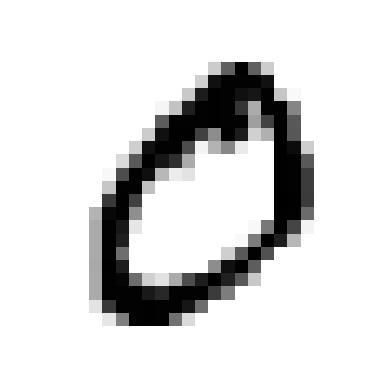

In [5]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis("off")


somedig = X[1]
plot_digit(somedig)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
y_train_0 = (y_train == '0')
y_test_0 = (y_test == '0')

In [8]:
from sklearn.linear_model import SGDClassifier

In [9]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(random_state=42)

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [11]:
cm = confusion_matrix(y_train_0, y_train_pred)
cm
#here 53486 are true negatives i.e. that much images are correctly classified as non 0 by model
#whereas 591 are false positives i.e. that much numbers were wrongly classified as 0 by model
#277 are false negatives i.e that much images were wongle classified as non 0 by model
# and 5646 are true positive i.e these much images were correctly classified as 0 by model

array([[53486,   591],
       [  277,  5646]])

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train_0, y_train_pred))
print(recall_score(y_train_0, y_train_pred))
f1_score(y_train_0, y_train_pred)

0.9052429052429053
0.9532331588721932


0.9286184210526315

In [13]:
y_score = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method='decision_function')
from sklearn.metrics import precision_recall_curve
precision, recall, threshholds = precision_recall_curve(y_train_0, y_score)


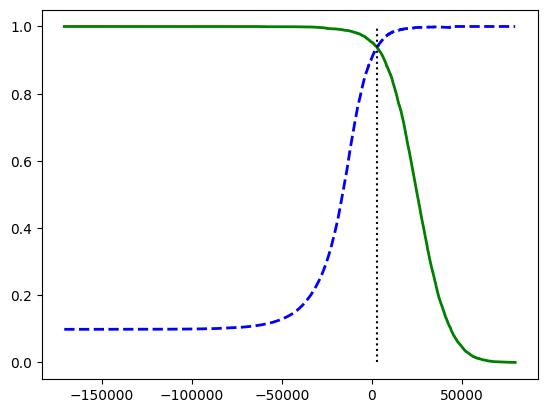

In [14]:
threshhold = 3000
plt.plot(threshholds, precision[:-1], "b--", label='Precision', linewidth=2)
plt.plot(threshholds, recall[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshhold, 0, 1.0, "k", "dotted", label="threshhold")
plt.show()

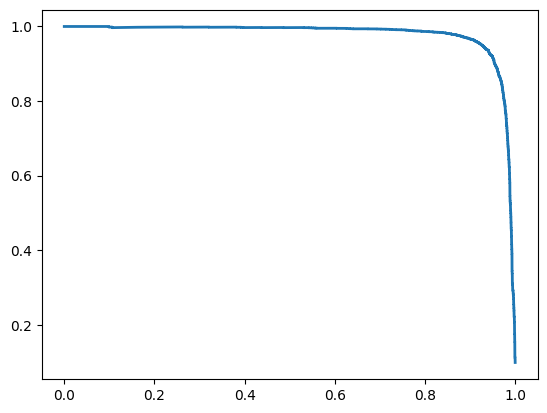

In [15]:
plt.plot(recall, precision, linewidth=2, label="Precsion/Recall curve")
plt.show()

In [16]:
from sklearn.metrics import roc_curve
fpr, tpr, threshhold1 = roc_curve(y_train_0, y_score)


In [20]:
idx_for_90_precision = (precision >= 0.90).argmax()
threshold_for_90_precision = threshholds[idx_for_90_precision]
idx_for_threshhold_at_90 = (threshhold1 >= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshhold_at_90], fpr[idx_for_threshhold_at_90]

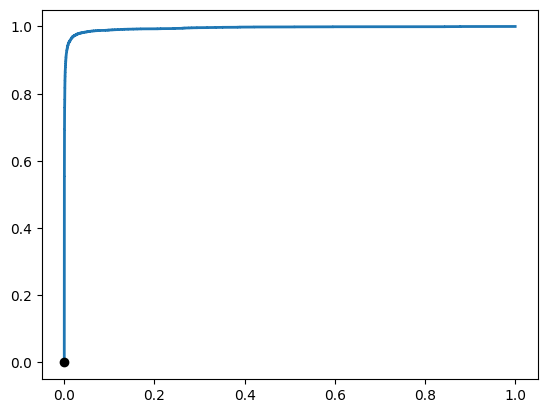

-411.0056907752512


In [18]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshhold fro 90 precision")
plt.show()
print(threshold_for_90_precision)